In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
def draw_trajectory(transforms_path, ax, color='r', size=20, interval=1, view_num=1):
    plt.style.use('seaborn-whitegrid')
    legend_flag = False
    

    with open(transforms_path) as json_file:
        contents = json.load(json_file)
        fovx = contents["camera_angle_x"]
        frames = contents["frames"]
        delta = 0.0
        cnt = 0
        pre_pos = None

        for idx, frame in enumerate(frames):
            if idx % (interval * view_num) != 0:
                continue
            file_path = os.path.split(frame['file_path'])[-1]
            # transform a to list
            c2w = np.array(frame['transform_matrix'])

            pos = c2w[:3, 3]  # camera center position
            x_dir = c2w[:3, 0] / (np.linalg.norm(c2w[:3, 0]) + 1e-8)
            y_dir = c2w[:3, 1] / (np.linalg.norm(c2w[:3, 1]) + 1e-8)
            z_dir = c2w[:3, 2] / (np.linalg.norm(c2w[:3, 2]) + 1e-8)
            a = pos + size * x_dir + size * y_dir + size * z_dir
            b = pos - size * x_dir + size * y_dir + size * z_dir
            c = pos - size * x_dir - size * y_dir + size * z_dir
            d = pos + size * x_dir - size * y_dir + size * z_dir

            dir = (a + b + c + d) / 4 - pos  # camera view direction, i.e. z-axis
            dir = dir / (np.linalg.norm(dir) + 1e-8)
            o = pos + dir * 3

            ax.arrow(pos[0], pos[1], size * x_dir[0], size * x_dir[1], color='r', head_width=size/2, label='x-axis')
            # ax.arrow(pos[1], pos[0], size * y_dir[1], size * y_dir[0], color='g', head_width=size/2, label='y-axis')
            ax.arrow(pos[0], pos[1], size * z_dir[0], size * z_dir[1], color='b', head_width=size/2, label='z-axis')
            if not legend_flag:
                ax.legend()
                legend_flag = True
            
            if pre_pos is None:
                pre_pos = pos
            else:
                delta += np.linalg.norm(pos - pre_pos)
                cnt += 1.0
                pre_pos = pos

    base_step = delta / cnt / interval
    print('Average step length: {:.2f}/{:.2f}m'.format(base_step * interval, base_step))
    print('Total images: {}/{}'.format(int(cnt), len(frames)))

    ax.axis('equal')
    ax.set_xlabel('x/m')
    ax.set_ylabel('y/m')

Average step length: 9.95/1.00m
Total images: 36/2214


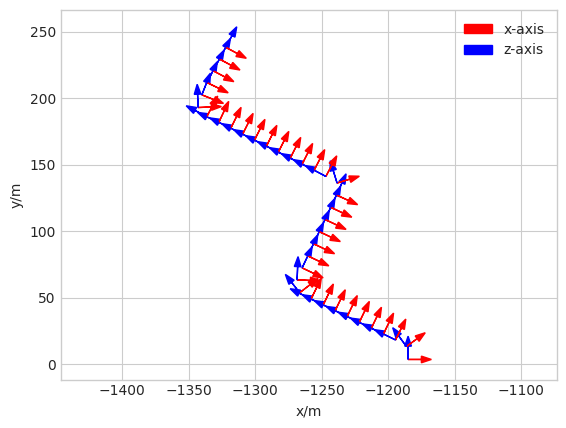

In [26]:
# data_path, subset = '../data/UE-collected', 'vehicle-train-20231114'
transforms_path = os.path.join('../data/UE-collected/street/train_dense/transforms_train.json')
fig = plt.figure()
ax = fig.gca()
draw_trajectory(transforms_path, ax, color='r', size=10, interval=10, view_num=6)
plt.show()